# Ch14. Recurrent Neural Networks 


### RNN : 미래를 예측할 수 있는 신경망 클래스 
#### - 시계열 데이터 예측 가능 

#### - 임의의 길이를 가진 연속적인(sequence) 데이터에서 동작 가능
- NLP 시스템 - 자동번역, 음성을 텍스트로, 감정분석 등에 활용

#### - 예측 능력에 따른 놀라운 창조력 
- 멜로디에서 다음으로 올 최적의 음을 선택함 (작곡)
- 작문, 이미지 설명 쓰기 등도 가능 

### 이번 장에서는 
 - RNN의 근본적인 개념 
 - RNN의 주요 문제 
 - 문제 해결을 위해 많이 사용되는 방법 
 - 기계번역시스템의 구조 


## Recurrent Neurons
### 순방향 네트워크 + 역방향을 가리키는 연결 
<img src = "image\ch14\rn.png">
#### - 가장 간단한 RNN 구조 (왼쪽)
- 출력을 생산하고 그 출력을 다시 자신에게 보냄 

#### - 시간을 축으로 나타낸 RNN (오른쪽) 
- t는 각각의 time step (frame이라고도 함)
- Reccurent Neuron은 현재 time step의 입력과 그 전 time step의 출력을 받음 
- Unrolling the network through time 이라고 불림 

### Recurrent Neuron들의 레이어 생성 
<img src = "image\ch14\rn2.png">
#### - 각 time step,  t에서 모든 뉴런은 입력 벡터 X(t)와 그 전 time step의 출력 벡터 y(t-1)을 받음 
- 입력과 출력은 모두 벡터 
    - 하나의 Recurrent Neuron만 있을 경우 출력은 스칼라 
    
#### - 각 Recurrent Neuron은 두 가지 가중치를 가짐 
- ① 입력 X(t)에 대한 가중치 : Wx
- ② 이전 time step의 출력 y(t-1)에 대한 가중치 : Wy

### Recurrent Neuron의 출력 
#### - single Recurrent Neuron의 출력 
<img src = "image\ch14\eq1.png">

#### - mini-batch내의 모든 데이터에 대한 Recurrent Neuron 레이어의 출력
<img src = "image\ch14\eq2.png">
- 벡터화 형식을 통해 전체 레이어의 출력을 한번에 계산
- Y(t) : (데이터 개수, 뉴런 개수) t에서의 출력 
- X(t) : (데이터 개수, 입력특징 개수) 모든 데이터에 대한 입력 
- Wx : (입력특징 개수, 뉴런 개수) 현재 t의 입력에 대한 가중치 
- Wy : (뉴런 개수, 뉴런 개수) 이전 t인 t-1의 출력에 대한 가중치 
    - 종종 가중치 Wx, Wy를 [W : (입력특징 개수 + 뉴런 개수)x뉴런 개수] 로 하나로 묶기도 함 
- b : (뉴런 개수) 각 뉴런의 바이어스 
- t = 0일 때는 이전 t의 출력값이 없으므로 보통 0으로 추정함 


### Memory Cells 
#### :  신경망 중에 time step을 가로질러 상태들을 보존하는 부분 (간단하게  Cell이라고 하기도 함) 
#### 하나의 Reccurent Neuron 또는 RN 레이어는 아주 basic cell 
- 뒤에서 좀 더 복잡하고 강력한 cell을 다룰 예정 

<img src = "image\ch14\state.png">
#### - h(t)
- t에서의 cell의 state
- 현재 time step에서의 입력과 그전 time step에서의 state에 대한 함수 
- h(t) = f(h(t-1), x(t))

#### -  y(t)
- t에서의 출력 
- 마찬가지로 이전 t의 state와 현재 입력에 대한 함수 

#### - basic cell의 경우 출력과 state는 거의 동일함 
- 하지만 더 복잡한 cell에서는 항상 동일하지 않음 


### Input and Output Sequences
#### -  입력 sequence를 동시에 처리할 수 있고 출력 sequence를 생산할 수 있음  
<img src = "image\ch14\rnn1.png">
- sequence to sequence
- 주식과 같은 시계열 데이터 예측에 유용 
    - 지난 N일 동안의 가격을 전달하고 그 다음 날로 전달된 가격을 출력함  
    
#### - 입력 sequence를 전달하고 마지막 출력을 제외한 나머지를 무시할 수 있음 
<img src = "image\ch14\rnn2.png">
- sequence to vector
- 영화 리뷰에 대응하는 단어 sequence를 전달하면 신경망은 감정 점수를 출력함  


#### - 하나의 time step에서 하나의 입력을 전달하고 sequence를 출력하도록 할 수 있음 
<img src = "image\ch14\rnn3.png">
- vector to sequence
- 이미지를 입력으로 전달하면 그 이미지에 대한 설명을 출력함 


#### - Encoder-Decoder
<img src = "image\ch14\rnn4.png">
- sequence to vector 인 encoder와 vector to sequence인 decoder
- 어떤 언어로 된 문장을 입력하면 encoder가 그 문장을 하나의 vector 표현으로 변환하고 decoder가 vector를 sequence로 decode함 
- 하나의 sequence to sequence RNN보다 더 잘 번역함 
- 하지만 번역에 있어서 문장의 마지막 단어가 첫번째 단어에 영향을 끼칠 수 있음 
    - 번역 전에 전체 문장 전체를 모두 들을 때까지 기다려야 함 

## Basic RNNs in Tensorflow 
#### Tensorflow의 RNN 연산 없이 아주 간단한 RNN 모델 생성하기 
- 5개의 Recurrent Neuron의 레이어로 구성된 RNN 구현 
<img src = "image\ch14\rn2.png">
- tanh 활성화 함수 사용 
- 두 개의 time step, 입력 벡터의 크기는 3 


In [1]:
import tensorflow as tf 
import numpy as np

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [2]:
reset_graph()
##그래프 
n_inputs = 3 #입력특징개수 
n_neurons = 5 #RN개수

#time step = 2
X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

#가중치
Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32)) #input - rn
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32)) #rn - rn 

#bias
b = tf.Variable(tf.zeros([1,n_neurons], dtype=tf.float32)) 

#출력
Y0 = tf.tanh(tf.matmul(X0, Wx) + b) #timestep0
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx)+b) #timestep1

init = tf.global_variables_initializer()

- 몇개의 차이점을 빼고는 두 개 레이어를 가진 순방향 신경망과 비슷함
    - 두 레이어에 같은 가중치와 bias 값이 공유됨 
    - 각 레이어에 입력을 전달하고 각 레이어의 출력을 얻음 
    - 모델 작동을 위해서는 입력과 time step을 전달해야줘야 함 

In [3]:
#예
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) #(4, 3)
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

##실행
with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0 : X0_batch, X1 : X1_batch})
        
print(Y0_val) #time step 0의 출력
print('')
print(Y1_val) #time step 1의 출력 

[[-0.06640061  0.96257669  0.68105787  0.70918542 -0.89821595]
 [ 0.99777555 -0.71978879 -0.99657613  0.96739244 -0.99989706]
 [ 0.99999785 -0.99898809 -0.99999887  0.99677628 -0.99999988]
 [ 1.         -1.         -1.         -0.99818921  0.99950868]]

[[ 1.         -1.         -1.          0.40200272 -0.99999994]
 [-0.12210429  0.62805295  0.96718436 -0.99371219 -0.25839329]
 [ 0.99999815 -0.9999994  -0.99999744 -0.85943311 -0.99998796]
 [ 0.99928296 -0.99999809 -0.99990588  0.98579615 -0.92205751]]


- Tensorflow의 RNN 연산을 통해 같은 모델을 구현해보자 

### Static Unrolling Through Time
#### static_rnn()
#### - chaining cell을 사용해 unrolled RNN을 구현함 

In [4]:
reset_graph()
#위에서 만든 것과 같은 모델 생성하기

##그래프 
X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

#cell 
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons) #RN은 5개 
output_sequs, states = tf.contrib.rnn.static_rnn(basic_cell, [X0, X1], dtype=tf.float32)

Y0, Y1 = output_sequs
S1 = states

init = tf.global_variables_initializer()

- 입력 placeholder 생성 
- BasicRNNCell 생성 
    - unrolled RNN 생성을 위해 cell 복사본들을 생성하는 공장 역할 
- static_rnn() 호출 
    - cell 공장, 입력텐서, 입력의 데이터 타입(초기 state 행렬 생성에 사용)을 넘겨줌  
    - 각 입력마다 cell 공장의 __call__() 함수를 호출하여 가중치와 bias를 공유하는 cell의 복사본 2개를 만들고 묶음 
    - 두 개의 객체를 반환 
        - 각 timestep에 대한 출력텐서를 가진 Python list 객체
        - 신경망의 최종 state를 가진 텐서 객체 
        - baisc cell 사용 시, 최종 state는 마지막 출력과 거의 동일 

In [5]:
#예
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

##실행
with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val, S1_val = sess.run([Y0, Y1, S1], feed_dict={X0 : X0_batch, X1 : X1_batch})
    
    
print(Y0_val)
print('')
print(Y1_val)
print('')
print(S1_val) #최종 state는 마지막 출력(Y1)과 동일

[[ 0.30741337 -0.32884312 -0.65428472 -0.93850589  0.52089024]
 [ 0.99122751 -0.95425415 -0.75180781 -0.99952078  0.98202336]
 [ 0.99992675 -0.99783254 -0.82473516 -0.99999636  0.99947786]
 [ 0.99677092 -0.68750608  0.84199691  0.93039113  0.81206834]]

[[ 0.99998885 -0.99976063 -0.06679297 -0.99998027  0.99982214]
 [-0.65249425 -0.5152086  -0.37968948 -0.59225941 -0.08968376]
 [ 0.99862403 -0.99715203 -0.03308632 -0.99915659  0.99329019]
 [ 0.99681675 -0.95981938  0.39660627 -0.83076048  0.79671967]]

[[ 0.99998885 -0.99976063 -0.06679297 -0.99998027  0.99982214]
 [-0.65249425 -0.5152086  -0.37968948 -0.59225941 -0.08968376]
 [ 0.99862403 -0.99715203 -0.03308632 -0.99915659  0.99329019]
 [ 0.99681675 -0.95981938  0.39660627 -0.83076048  0.79671967]]


#### - 여러개의 timestep을 가지는 경우 
- 50 timestep일 때, 50개의 입력 placeholder와 50개의 출력 텐서를 정의하는 것은 매우 불편 
- 간단하게 처리하는 방법 
    - 입력 placeholder를 하나로 설정, [mini-batch 크기, n_steps, n_inputs]의 형태 

In [6]:
reset_graph()

##그래프 
n_steps = 2
n_inputs = 3
n_neurons = 5

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs]) #[mini-batch크기, n_steps, n_inputs]

#[mini-batch크기, n_inputs] 형태의 n_steps의 리스트  #(4, 2, 3)
#transpose()를 사용해 n_steps가 첫번째 차원으로 [n_steps, mini-batch크기, n_inputs] #(2, 4, 3)
#unstack()를 사용해 각 timestep의 입력sequence 리스트 추출  #(4, 3)
X_seqs = tf.unstack(tf.transpose(X, perm=[1, 0, 2]))

#위와 동일
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, X_seqs, dtype=tf.float32)

#output_seqs는 (4, 5)
#stack()를 사용해 모든 출력 텐서를 하나의 텐서로 합침 (2, 4, 5)
#transpose()를 사용해 최종 출력 텐서의 형태는 [mini-batch크기, n_steps, n_neurons] (4, 2, 5)
outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0, 2]) 

init = tf.global_variables_initializer()

##예
#모든 mini-batch sequence로 구성된 하나의 텐서를 신경망에 전달 
X_batch = np.array([
    [[0, 1, 2], [9, 8, 7]], 
    [[3, 4, 5], [0, 0, 0]], 
    [[6, 7, 8], [6, 5, 4]], 
    [[9, 0, 1], [3, 2, 1]]
])

##실행 
with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X : X_batch}) #하나의 출력 텐서 
    
    
print(outputs_val) #(4, 2, 5)

[[[-0.45652321 -0.68064117  0.40938237  0.63104498 -0.45732823]
  [-0.94288003 -0.99988687  0.94055808  0.99999845 -0.99999976]]

 [[-0.80015343 -0.99218273  0.78177965  0.99710321 -0.99646091]
  [-0.63711601  0.11300934  0.5798437   0.43105593 -0.6371699 ]]

 [[-0.93605185 -0.99983793  0.93088669  0.9999814  -0.99998313]
  [-0.9165386  -0.99456036  0.89605415  0.99987191 -0.99997509]]

 [[ 0.99273676 -0.99819332 -0.55543649  0.99890316 -0.9953323 ]
  [-0.02746333 -0.73191983  0.7827872   0.95256817 -0.97817719]]]


In [7]:
X_batch = np.array([
    [[0, 1, 2], [9, 8, 7]], 
    [[3, 4, 5], [0, 0, 0]], 
    [[6, 7, 8], [6, 5, 4]], 
    [[9, 0, 1], [3, 2, 1]]
])
print(X_batch.shape)

(4, 2, 3)


- 하지만 이러한 방법은 여전히 time step마다 하나의 cell을 포함한 그래프를 생성함 
- 큰 그래프에서는 역전파 동안 out-of-memory(OOM) 에러가 생길 수 있음 (역전파를 위해 순전파에서 사용된 모든 텐서값을 저장하고 있어야 함)

### Dynamic Unrolling Through Time
#### dynamic_rnn() 
#### - cell이 적절한 횟수만큼 실행될 수 있도록 while_loop() 사용
- 역전파에서, while_loop()는 각 반복에서 순방향에서의 텐서값을 저장하여 역전파시 기울기를 계산하는 데 사용할 수 있도록 함 


#### - swap_memory = True 설정 시, 역전파동안의 OOM 에러를 피할 수 있게 GPU 메모리를 CPU 메모리로 옮길 수 있음 
#### - 모든 timestep에서 입력과 출력은 하나의 텐서 
#### - stack, unstack, transpose와 같은 작업이 필요 없음

In [8]:
reset_graph()

##그래프  
n_steps = 2
n_inputs = 3
n_neurons = 5

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs]) 

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32) ##

init = tf.global_variables_initializer()

##예
X_batch = np.array([
    [[0, 1, 2], [9, 8, 7]], 
    [[3, 4, 5], [0, 0, 0]], 
    [[6, 7, 8], [6, 5, 4]], 
    [[9, 0, 1], [3, 2, 1]]
])

##실행 
with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X : X_batch}) 
    
print(outputs_val) 

[[[-0.09488751 -0.78635406 -0.75976861  0.81456453 -0.86596662]
  [-0.99999815 -0.99989909 -0.99999416  0.99959815 -0.40855828]]

 [[-0.98823678 -0.99379843 -0.99848312  0.99407363 -0.9553898 ]
  [ 0.21658953 -0.20340657  0.0259128   0.44528607 -0.40116799]]

 [[-0.9999153  -0.99983823 -0.99999154  0.99982715 -0.98561245]
  [-0.99981052 -0.99268615 -0.99952883  0.99385989 -0.25559658]]

 [[-0.99883723  0.84198499 -0.97267139 -0.86984289  0.99912697]
  [-0.97511077 -0.3484098  -0.9212814   0.39821982  0.2795389 ]]]


### Handling Variable Length Input Sequences
#### 입력 sequence가 다양한 길이를 가진 경우도 존재 
#### - dynamic_rnn() 이나 static_rnn() 호출 시, sequence_length 파라미터를 설정
- sequence_length 파라미터는 각 데이터마다의 입력 sequence 길이를 나타내는 1차원 텐서 

#### - 예 
- 두번째 입력 sequence가 1개의 입력만 가짐 
- 입력 텐서의 두번째 차원은 가장 긴 sequence의 크기이기 때문에 입력이 없는 부분을 0으로 채워줌 

In [9]:
reset_graph()

##그래프 
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
seq_length = tf.placeholder(tf.int32, [None]) #길이 

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32, 
                                   sequence_length=seq_length) #sequence_length파라미터

init = tf.global_variables_initializer()

##예
#두번째 input sequence가 2개가 아닌 1개 
X_batch = np.array([
    [[0, 1, 2], [9, 8, 7]],
    [[3, 4, 5], [0, 0, 0]], #두번째 input sequence가 2개가 아닌 1개(padded with zero vector)
    [[6, 7, 8], [6, 5, 4]],
    [[9, 0, 1], [3, 2, 1]]
])

seq_length_batch = np.array([2, 1, 2, 2]) #1차원 텐서

init = tf.global_variables_initializer()

##실행
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X : X_batch, seq_length : seq_length_batch})
    
print('outputs')    
print(outputs_val)
print('\nstate')
print(states_val)

outputs
[[[ 0.73155701  0.3483572   0.50582004 -0.22882834 -0.44022721]
  [-0.61832327  0.99999994  0.865848    0.97933763  0.99022454]]

 [[ 0.84387034  0.99697542  0.84789455  0.43032196  0.09275493]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 0.9115923   0.99999052  0.95954448  0.81892222  0.57740241]
  [-0.77545458  0.99987745  0.97847283  0.73172009  0.88877612]]

 [[-0.99952275  0.99977851  0.5974465   0.99309695  0.99847412]
  [-0.62119997  0.54000831  0.96938437  0.19893228  0.19448037]]]

state
[[-0.61832327  0.99999994  0.865848    0.97933763  0.99022454]
 [ 0.84387034  0.99697542  0.84789455  0.43032196  0.09275493]
 [-0.77545458  0.99987745  0.97847283  0.73172009  0.88877612]
 [-0.62119997  0.54000831  0.96938437  0.19893228  0.19448037]]


- 입력이 없는 부분에는 0이 출력됨 
- state 텐서는 각 cell의 최종 state를 포함함 
    - 두번째 입력의 state값은 timestep 1일때가 아닌 timestep 0일때의 state 

### Handling Variable-Length Output Sequences
#### - 출력 sequence가 다양한 길이를 가지는 경우도 존재 
- 각 sequence의 길이를 미리 알 수 있다면 sequence_length 파라미터를 통해 설정 가능 
- 하지만 미리 알 수 없는 경우가 대부분 (번역 전의 문장과 번역 후의 문장의 길이는 보통 다름)
- 가장 일반적인 해결책 
    - end-of-sequence token(EOS token)이라는 특별한 출력을 정의
    - EOS를 거친 출력은 무시됨 (뒤에서 다시 설명) 
    

## Training RNNs
### backpropagation through time(BPTT) 전략 
#### 시간 순으로 펼친 후 역전파 적용 
<img src = "image\ch14\back.png">
#### - 먼저 순방향 전달 진행(점선 화살표) 
- 출력 sequence는 비용함수를 통해 평가 
<img src = "image\ch14\cost.png">
    - t(min)과 t(max)는 처음과 마지막 timestep의 출력
    - 무시되는 timestep의 출력(Y(0), Y(1))은 포함되지 않음 
    
#### - 비용함수의 기울기를 역전파(실선 화살표)
- BPTT동안 계산된 기울기를 사용해 모델 파라미터 업데이트 
- 마지막 출력만이 아니라 비용함수에 사용된 출력에 기울기 역전파 (Y(2), Y(3), Y(4))

### Training a Sequence Classifier
#### MNIST 영상을 분류하도록 RNN 학습 
#### - 각 영상을 (28, 28)의 sequence로 다룸 
#### - 150개의 Recurrent Neuron 사용 
#### - 마지막에는 10개의 뉴런을 포함하는 fully connected 레이어 사용하고 softmax 사용 
- fully connected 레이어는 RNN의 최종 state(28번째 state) 값을 가지는 states 텐서와 연결
<img src = "image\ch14\classifier.png">

In [10]:
reset_graph()
from tensorflow.contrib.layers import fully_connected

##그래프 
n_steps = 28
n_inputs = 28
n_neurons = 150 
n_outputs = 10 

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None]) #타겟 클래스에 대한 placeholder 

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = fully_connected(states, n_outputs, activation_fn=None) #fc레이어를 거친 후 
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)

loss = tf.reduce_mean(xentropy) #전체의 평균 
optimaizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimaizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

##데이터 
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('/tmp/data')
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs)) #(10000, 28, 28)
y_test = mnist.test.labels #(10000, )

##실행 
n_epochs = 100
batch_size = 150 

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size) 
            X_batch = X_batch.reshape(-1, n_steps, n_inputs) 
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        acc_train = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict={X:X_test, y:y_test})
        print(epoch, 'Train Accuracy :', acc_train, 'Test Accuracy', acc_test)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
0 Train Accuracy : 0.946667 Test Accuracy 0.9366
1 Train Accuracy : 0.966667 Test Accuracy 0.9488
2 Train Accuracy : 0.946667 Test Accuracy 0.9552
3 Train Accuracy : 0.953333 Test Accuracy 0.9592
4 Train Accuracy : 0.96 Test Accuracy 0.9615
5 Train Accuracy : 0.993333 Test Accuracy 0.9674
6 Train Accuracy : 0.966667 Test Accuracy 0.9661
7 Train Accuracy : 0.986667 Test Accuracy 0.9709
8 Train Accuracy : 0.946667 Test Accuracy 0.9678
9 Train Accuracy : 0.953333 Test Accuracy 0.9693
10 Train Accuracy : 0.986667 Test Accuracy 0.974
11 Train Accuracy : 0.96 Test Accuracy 0.9722
12 Train Accuracy : 1.0 Test Accuracy 0.9758
13 Train Accuracy : 0.993333 Test Accuracy 0.9652
14 Train Accuracy : 0.98 Test Accuracy 0.971
15 Train Accuracy : 0.98 Test Accuracy 0.974
16 Train Accuracy : 0.986667 Test Accuracy 0

### Training to Predict Time Seriese
#### 시계열 데이터(주가, 기온, 뇌파 등) 다루기
#### 이번 부분에서는 생성된 시계열에서 다음 값을 예측하도록 RNN 학습 
- 각각의 학습 데이터는 시계열에서 임의적으로 선택된 20개의 연이은 값 
- 타겟 sequence는 입력 sequence와 동일하지만 입력보다 한 time step 앞섬 

#### - 100개의 Recurrent Neuron, 20 time steps(각 학습 데이터의 입력 길이는 20) 
#### - 각 입력은 하나의 특징만을 가짐 (각 time step에서의 입력은 1개)

In [232]:
def time_series(t): #시계열 데이터 
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

In [177]:
#batch_size = 50, n_steps = 20, n_inputs = 1
t0 = np.random.rand(50, 1) * (30 - 0 - 20 * 0.1)
print(t0)
print(t0.shape)

[[  2.36298666]
 [ 11.18232496]
 [ 25.48376983]
 [ 22.62463364]
 [  6.04943822]
 [ 13.06501797]
 [ 22.86824967]
 [  1.88676753]
 [ 10.8469924 ]
 [ 23.85155463]
 [ 11.3091402 ]
 [  2.17321005]
 [ 15.19096232]
 [ 24.12878986]
 [ 16.5279952 ]
 [  6.33581503]
 [ 10.75870936]
 [ 12.60345411]
 [ 16.21945791]
 [ 21.26182872]
 [  2.76846129]
 [ 24.91025692]
 [  0.34467168]
 [ 10.36146537]
 [  0.76776868]
 [ 11.00327831]
 [ 14.72275277]
 [ 14.32707882]
 [  4.63759372]
 [ 18.08073428]
 [  1.25379661]
 [ 21.33339096]
 [ 26.50604415]
 [  9.51352716]
 [ 14.48270269]
 [ 10.60948779]
 [  0.18789093]
 [ 10.80448608]
 [ 22.16816726]
 [ 16.68768758]
 [  2.83527761]
 [ 23.71990571]
 [ 14.87038966]
 [ 23.56825413]
 [ 16.24620253]
 [ 15.67127646]
 [  2.94725719]
 [  4.68607253]
 [ 27.21670718]
 [  6.39762891]]
(50, 1)


In [178]:
Ts = t0 + np.arange(0., 20+1) * 0.1
print(Ts)
print(Ts.shape) #브로드캐스팅 

[[  2.36298666   2.46298666   2.56298666 ...,   4.16298666   4.26298666
    4.36298666]
 [ 11.18232496  11.28232496  11.38232496 ...,  12.98232496  13.08232496
   13.18232496]
 [ 25.48376983  25.58376983  25.68376983 ...,  27.28376983  27.38376983
   27.48376983]
 ..., 
 [  4.68607253   4.78607253   4.88607253 ...,   6.48607253   6.58607253
    6.68607253]
 [ 27.21670718  27.31670718  27.41670718 ...,  29.01670718  29.11670718
   29.21670718]
 [  6.39762891   6.49762891   6.59762891 ...,   8.19762891   8.29762891
    8.39762891]]
(50, 21)


<img src = "image\ch14\broadcast.png">

In [179]:
print(np.arange(0, 21))
print(np.arange(0, 21).shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
(21,)


In [180]:
ys = time_series(Ts)
print(ys)
print(ys.shape)

[[-0.81221397  0.01775315  0.95921815 ...,  0.66286605 -0.02820922
  -1.01584519]
 [-4.85227362 -3.88044376 -2.80379342 ...,  3.49504789  3.21691079
   2.66220537]
 [ 4.88709497  5.26691375  5.2361691  ...,  5.6636562   5.16328925
   5.06109852]
 ..., 
 [-3.54419439 -3.45682536 -2.89625723 ...,  2.1340097   2.65164954
   2.68020694]
 [ 6.22609198  5.45252499  5.08898785 ..., -5.45907972 -5.48787544
  -5.8783396 ]
 [ 1.32651963  2.21743326  2.68018581 ...,  2.27896398  1.29182473
   0.5722109 ]]
(50, 21)


In [181]:
print(ys[:, :-1]) #마지막 열 제외 
print(ys[:, :-1].shape) 

[[ -8.12213975e-01   1.77531504e-02   9.59218150e-01   1.76997870e+00
    2.23748432e+00   2.23093766e+00   1.73341660e+00   8.46152016e-01
   -2.36086839e-01  -1.27247423e+00  -2.03485371e+00  -2.36333197e+00
   -2.20513222e+00  -1.62719769e+00  -7.99463030e-01   4.71067167e-02
    6.77431720e-01   9.10248171e-01   6.62866055e-01  -2.82092172e-02]
 [ -4.85227362e+00  -3.88044376e+00  -2.80379342e+00  -1.86337567e+00
   -1.25807946e+00  -1.09610635e+00  -1.36874437e+00  -1.95285871e+00
   -2.64148703e+00  -3.19504540e+00  -3.40060345e+00  -3.12471104e+00
   -2.34683628e+00  -1.16522133e+00   2.26285645e-01   1.58475840e+00
    2.67669795e+00   3.33420073e+00   3.49504789e+00   3.21691079e+00]
 [  4.88709497e+00   5.26691375e+00   5.23616910e+00   4.98175096e+00
    4.73606956e+00   4.71836522e+00   5.07934030e+00   5.86268735e+00
    6.99294958e+00   8.29270137e+00   9.52485673e+00   1.04497599e+01
    1.08830910e+01   1.07404194e+01   1.00575025e+01   8.98136709e+00
    7.73435834e+00

In [182]:
print(ys[:, :-1].reshape(-1, 20, 1)) #(batch_size, n_steops, n_inputs)
print( ys[:, :-1].reshape(-1, 20, 1).shape) #입력(X_batch)

[[[ -8.12213975e-01]
  [  1.77531504e-02]
  [  9.59218150e-01]
  [  1.76997870e+00]
  [  2.23748432e+00]
  [  2.23093766e+00]
  [  1.73341660e+00]
  [  8.46152016e-01]
  [ -2.36086839e-01]
  [ -1.27247423e+00]
  [ -2.03485371e+00]
  [ -2.36333197e+00]
  [ -2.20513222e+00]
  [ -1.62719769e+00]
  [ -7.99463030e-01]
  [  4.71067167e-02]
  [  6.77431720e-01]
  [  9.10248171e-01]
  [  6.62866055e-01]
  [ -2.82092172e-02]]

 [[ -4.85227362e+00]
  [ -3.88044376e+00]
  [ -2.80379342e+00]
  [ -1.86337567e+00]
  [ -1.25807946e+00]
  [ -1.09610635e+00]
  [ -1.36874437e+00]
  [ -1.95285871e+00]
  [ -2.64148703e+00]
  [ -3.19504540e+00]
  [ -3.40060345e+00]
  [ -3.12471104e+00]
  [ -2.34683628e+00]
  [ -1.16522133e+00]
  [  2.26285645e-01]
  [  1.58475840e+00]
  [  2.67669795e+00]
  [  3.33420073e+00]
  [  3.49504789e+00]
  [  3.21691079e+00]]

 [[  4.88709497e+00]
  [  5.26691375e+00]
  [  5.23616910e+00]
  [  4.98175096e+00]
  [  4.73606956e+00]
  [  4.71836522e+00]
  [  5.07934030e+00]
  [  5.86

In [183]:
print(ys[:, 1:]) #첫번째 열 제외 
print(ys[:, 1:].shape)  

[[  1.77531504e-02   9.59218150e-01   1.76997870e+00   2.23748432e+00
    2.23093766e+00   1.73341660e+00   8.46152016e-01  -2.36086839e-01
   -1.27247423e+00  -2.03485371e+00  -2.36333197e+00  -2.20513222e+00
   -1.62719769e+00  -7.99463030e-01   4.71067167e-02   6.77431720e-01
    9.10248171e-01   6.62866055e-01  -2.82092172e-02  -1.01584519e+00]
 [ -3.88044376e+00  -2.80379342e+00  -1.86337567e+00  -1.25807946e+00
   -1.09610635e+00  -1.36874437e+00  -1.95285871e+00  -2.64148703e+00
   -3.19504540e+00  -3.40060345e+00  -3.12471104e+00  -2.34683628e+00
   -1.16522133e+00   2.26285645e-01   1.58475840e+00   2.67669795e+00
    3.33420073e+00   3.49504789e+00   3.21691079e+00   2.66220537e+00]
 [  5.26691375e+00   5.23616910e+00   4.98175096e+00   4.73606956e+00
    4.71836522e+00   5.07934030e+00   5.86268735e+00   6.99294958e+00
    8.29270137e+00   9.52485673e+00   1.04497599e+01   1.08830910e+01
    1.07404194e+01   1.00575025e+01   8.98136709e+00   7.73435834e+00
    6.55996112e+00

In [184]:
print(ys[:, 1:].reshape(-1, 20, 1)) #(batch_size, n_steps, n_outputs)
print(ys[:, 1:].reshape(-1, 20, 1).shape)  #타겟 (y_batch)

[[[  1.77531504e-02]
  [  9.59218150e-01]
  [  1.76997870e+00]
  [  2.23748432e+00]
  [  2.23093766e+00]
  [  1.73341660e+00]
  [  8.46152016e-01]
  [ -2.36086839e-01]
  [ -1.27247423e+00]
  [ -2.03485371e+00]
  [ -2.36333197e+00]
  [ -2.20513222e+00]
  [ -1.62719769e+00]
  [ -7.99463030e-01]
  [  4.71067167e-02]
  [  6.77431720e-01]
  [  9.10248171e-01]
  [  6.62866055e-01]
  [ -2.82092172e-02]
  [ -1.01584519e+00]]

 [[ -3.88044376e+00]
  [ -2.80379342e+00]
  [ -1.86337567e+00]
  [ -1.25807946e+00]
  [ -1.09610635e+00]
  [ -1.36874437e+00]
  [ -1.95285871e+00]
  [ -2.64148703e+00]
  [ -3.19504540e+00]
  [ -3.40060345e+00]
  [ -3.12471104e+00]
  [ -2.34683628e+00]
  [ -1.16522133e+00]
  [  2.26285645e-01]
  [  1.58475840e+00]
  [  2.67669795e+00]
  [  3.33420073e+00]
  [  3.49504789e+00]
  [  3.21691079e+00]
  [  2.66220537e+00]]

 [[  5.26691375e+00]
  [  5.23616910e+00]
  [  4.98175096e+00]
  [  4.73606956e+00]
  [  4.71836522e+00]
  [  5.07934030e+00]
  [  5.86268735e+00]
  [  6.99

In [185]:
#np.linspace(x, y, z) :  x ~ y를 균등한 z개의 구간으로 나눈다 
#np.linspace(0, 30, 300) : 0~ 30을 균등한 300개의 구간으로 나눈다 
t = np.linspace(t_min, t_max, int((30 - 0) / 0.1))
t

array([  0.        ,   0.10033445,   0.2006689 ,   0.30100334,
         0.40133779,   0.50167224,   0.60200669,   0.70234114,
         0.80267559,   0.90301003,   1.00334448,   1.10367893,
         1.20401338,   1.30434783,   1.40468227,   1.50501672,
         1.60535117,   1.70568562,   1.80602007,   1.90635452,
         2.00668896,   2.10702341,   2.20735786,   2.30769231,
         2.40802676,   2.5083612 ,   2.60869565,   2.7090301 ,
         2.80936455,   2.909699  ,   3.01003344,   3.11036789,
         3.21070234,   3.31103679,   3.41137124,   3.51170569,
         3.61204013,   3.71237458,   3.81270903,   3.91304348,
         4.01337793,   4.11371237,   4.21404682,   4.31438127,
         4.41471572,   4.51505017,   4.61538462,   4.71571906,
         4.81605351,   4.91638796,   5.01672241,   5.11705686,
         5.2173913 ,   5.31772575,   5.4180602 ,   5.51839465,
         5.6187291 ,   5.71906355,   5.81939799,   5.91973244,
         6.02006689,   6.12040134,   6.22073579,   6.32

In [186]:
(30 - 0) / 0.1

300.0

In [187]:
#np.linspace(12.2, 14.3, 21) : 12.2 ~ 14.3을 균등한 21개의 구간으로 나눈다 
t_instance = np.linspace(12.2, 12.2 + 0.1 * (20 + 1), 20 + 1) #20개의 연속적인 sequence
print(t_instance)
print(t_instance.shape)

[ 12.2    12.305  12.41   12.515  12.62   12.725  12.83   12.935  13.04
  13.145  13.25   13.355  13.46   13.565  13.67   13.775  13.88   13.985
  14.09   14.195  14.3  ]
(21,)


In [188]:
time_series(t)

array([  0.        ,   0.96513483,   1.69987938,   2.02542162,
         1.86524792,   1.26392234,   0.37599837,  -0.57220264,
        -1.33852501,  -1.72483746,  -1.62606261,  -1.05629131,
        -0.14554266,   0.89203535,   1.81069183,   2.39338499,
         2.50502087,   2.12550266,   1.35445   ,   0.38642907,
        -0.53719831,  -1.18793664,  -1.40662337,  -1.14278134,
        -0.46715632,   0.44565232,   1.36018938,   2.03817488,
         2.29726832,   2.05608451,   1.35436728,   0.3433489 ,
        -0.75133018,  -1.68500471,  -2.25402459,  -2.3456576 ,
        -1.96556009,  -1.23604896,  -0.36560492,   0.4028734 ,
         0.85230747,   0.84531932,   0.35847114,  -0.51157905,
        -1.57152779,  -2.57870847,  -3.30055842,  -3.57162041,
        -3.33403587,  -2.65155495,  -1.69361502,  -0.69341485,
         0.10967986,   0.52920324,   0.47756956,  -0.012366  ,
        -0.7954808 ,  -1.65027854,  -2.33365759,  -2.64105592,
        -2.45714908,  -1.78460498,  -0.74380651,   0.45

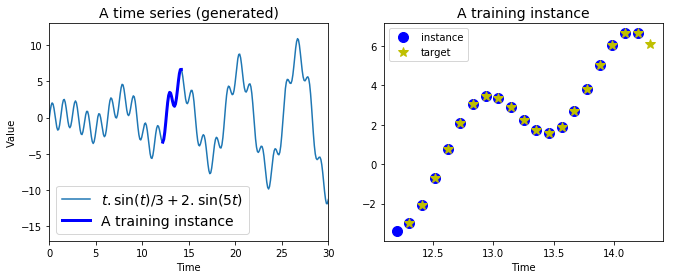

In [202]:
import matplotlib.pyplot as plt

t_min, t_max = 0, 30
resolution = 0.1

t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution)) #0 ~ 30을 균등한 300개의 구간으로 나눔 

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1) #12.2 ~ 14.3을 균등한 21개의 구간으로 나눔 

##하늘색 부분 (시계열 데이터 전체 )
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")  #(시간, 값)

##진한 파랑색 부분 (학습에 사용할 20개의 연속된 시계열 데이터)
#t_instance[:-1] #마지막 열 제외 (20개의 입력)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)

##instance(파란 동그라미) 마지막 열 제외 (20개) 
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")

##target(빨간 별) 첫번째 열 제외 (20개) -- 타겟은 입력보다 한 time step 앞선다 
plt.plot(t_instance[1:], time_series(t_instance[1:]), "y*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")


plt.show()

In [236]:
reset_graph()

##그래프 
n_steps = 20  #timestep
n_inputs = 1  #입력되는 것 (feature)
n_neurons = 100 #RN
n_outputs = 1  #출력되는 것 

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs]) #입력
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs]) #타겟

cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

- 출력 vector의 크기는 100(n_neurons)
- 하지만 우리가 원하는 것은 각 timestep마다 하나의 출력값이 나오도록 하는 것 
- OutputProjectionWrapper 사용 
    - 각 출력에 대해 활성화 함수 없이 선형 뉴런의 fully connected 레이어를 추가함
    - state에는 영향을 끼치지 않음 
    - 모든 fully connected 레이어는 같은 가중치와 바이어스를 공유함 
 
<img src = "image\ch14\outputprojection.png"> 

In [238]:
reset_graph()

##그래프 
n_steps = 20  #timestep
n_inputs = 1  #입력되는 것 (feature)
n_neurons = 100 #RN
n_outputs = 1  #출력되는 것 

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs]) #입력
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs]) #타겟

#OutputProjectionWrapper
cell = tf.contrib.rnn.OutputProjectionWrapper( 
                        tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu), output_size=n_outputs) #출력은 1개 
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

learning_rate = 0.001

#비용함수 정의 
#MSE(평균제곱오차)사용
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()


##실행 
n_iterations = 1500
batch_size = 50 

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps) 
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
            
    saver.save(sess, "./my_time_series_model")

0 	MSE: 18.9177
100 	MSE: 0.762549
200 	MSE: 0.290915
300 	MSE: 0.149381
400 	MSE: 0.0769497
500 	MSE: 0.0680263
600 	MSE: 0.0631773
700 	MSE: 0.0550132
800 	MSE: 0.0554401
900 	MSE: 0.0530196
1000 	MSE: 0.0533535
1100 	MSE: 0.0522311
1200 	MSE: 0.0441927
1300 	MSE: 0.0523661
1400 	MSE: 0.0473278


In [192]:
##학습시킨 모델로 데이터 예측하기 
with tf.Session() as sess:                          
    saver.restore(sess, "./my_time_series_model")   

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs))) #데이터 
    y_pred = sess.run(outputs, feed_dict={X: X_new}) #예측

INFO:tensorflow:Restoring parameters from ./my_time_series_model


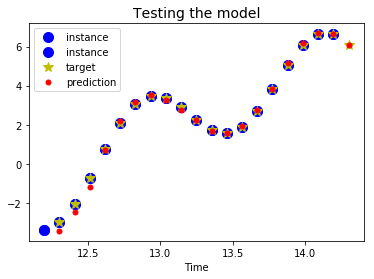

In [201]:
plt.title("Testing the model", fontsize=14)

##instance
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
##target
plt.plot(t_instance[1:], time_series(t_instance[1:]), "y*", markersize=10, label="target")
##prediction
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")

plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

- RNN의 출력 sequence 차원축소에는 OutputProjectionWrapper가 가장 간단한 해결책이지만 가장 효율적인 해결책은 아님 


#### 다른 방법 
- RNN의 출력을 재형성 
    - [batch_size, n_steps, n_neurons]에서 [batch_size * n_steps, n_neurons]
- 원하는 출력 크기로 fully connected 레이어 적용 (예에서는 1)
- 다시 [batch_size, n_steps, n_outputs]로 재형성 
- 더 빠름 
<img src = "image\ch14\stack.png"> 

In [233]:
reset_graph()

##그래프 
n_steps = 20  #timestep
n_inputs = 1  #입력되는 것 (feature)
n_neurons = 100 #RN
n_outputs = 1  #출력되는 것 

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs]) #입력
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs]) #타겟

#OutputProjectionWrapper 사용하지 않음 
cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

#reshape()로 출력들을stack해서 fc레이어 적용 
#rnn_outputs : (50, 20, 100)
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) #(1000, 100)
stacked_outputs = fully_connected(stacked_rnn_outputs, n_outputs, activation_fn=None) #(1000, 1)
#영사하는 것 뿐이기 때문에 활성화함수 사용안함 

#다시 reshape()로 출력들 unstack 
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs]) #(50, 20, 1)

#비용함수 정의 
#MSE(평균제곱오차)사용
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

##실행 
n_iterations = 1500
batch_size = 50 

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    saver.save(sess, "./my_time_series_model")        

0 	MSE: 10.1622
100 	MSE: 0.406719
200 	MSE: 0.114285
300 	MSE: 0.0689928
400 	MSE: 0.0688664
500 	MSE: 0.0634294
600 	MSE: 0.0579836
700 	MSE: 0.0501249
800 	MSE: 0.0515008
900 	MSE: 0.0501528
1000 	MSE: 0.0504802
1100 	MSE: 0.0491024
1200 	MSE: 0.0411799
1300 	MSE: 0.0475594
1400 	MSE: 0.0421529


### Creative RNN 
#### 미래를 예측하는 모델을 창의적인 sequence를 생성하는데에 사용할 수 있음 
- 모델이 다음값을 예측할 수 있도록 n_step값을 포함하는 seed sequence를 제공
- 예측값을 sequence에 더함 
- 다음 값을 예측하도록 마지막 n_step값을 모델에 전달 
- 이 과정을 통해 원본 시계열과 유사함을 가진 새로운 sequence가 생성됨 


#### - seed sequence가 0일 때 sequence 생성하기 

In [239]:
with tf.Session() as sess:                        
    saver.restore(sess, "./my_time_series_model") 

    sequence = [0.] * n_steps #seed sequence
    
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./my_time_series_model


In [207]:
with tf.Session() as sess:                        
    saver.restore(sess, "./my_time_series_model") 

    sequence = [0.] * n_steps #seed sequence
    
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1) #(1, 20, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch}) #(1, 20, 1)
        sequence.append(y_pred[0, -1, 0]) #0번째에서, -1번째 행의 0번째 열의 원소를 sequence에 더함 
    print(y_pred)
    print(y_pred.shape)
    print(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./my_time_series_model
[[[ -52077.09375   ]
  [ -55819.34375   ]
  [ -57489.19140625]
  [ -61106.4921875 ]
  [ -62113.5078125 ]
  [ -64518.0546875 ]
  [ -69387.2890625 ]
  [ -71696.3203125 ]
  [ -73098.5       ]
  [ -74218.7421875 ]
  [ -76189.2734375 ]
  [ -79678.546875  ]
  [ -82900.625     ]
  [ -86121.078125  ]
  [ -89327.5859375 ]
  [ -92196.9453125 ]
  [ -94769.7265625 ]
  [ -97600.25      ]
  [-100844.9140625 ]
  [-104529.640625  ]]]
(1, 20, 1)
-104530.0


In [209]:
sequence = [0.] * n_steps
print(sequence)
print(len(sequence))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
20


In [210]:
np.array(sequence[-20:])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [211]:
np.array(sequence[:20])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [212]:
np.array(sequence[-n_steps:]).reshape(1, 20, 1)

array([[[ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]])

In [213]:
np.array(sequence[:n_steps]).reshape(1, 20, 1)

array([[[ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]])

#### y_pred[0, -1, 0]

In [214]:
y = np.array([[[1, 2, 3], [4, 5, 6]],
               [[7, 8, 9], [10, 11, 12]],
              [[13, 14, 15], [16, 17, 18]]
             ])
print(y.shape)
print(y)

(3, 2, 3)
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]]


In [215]:
y[0, -1, 0] #0번째에서, -1번째(뒤에서 첫번째)행의 0번째 열의 원소 

4

In [216]:
y[1, 1, 1] #1번째에서, 1번째행의 1번째 열의 원소 

11

In [217]:
y[2, 0, -1] #2번째에서, 0번째 행의 -1번째 열의 원소 

15

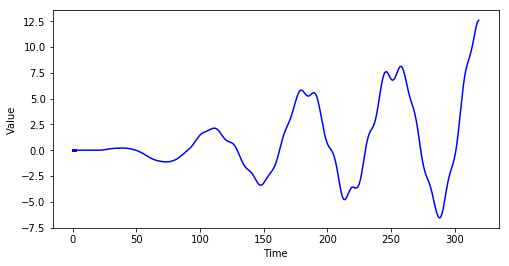

In [240]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(sequence)), sequence, "b-")

plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

#### - seed sequence가 0이 아닐 때 (값이 있을 때) sequence 생성하기 

In [242]:
with tf.Session() as sess:                        
    saver.restore(sess, "./my_time_series_model") 
    
    sequence2 = [time_series(i * resolution + t_min + (t_max-t_min/3)) for i in range(n_steps)] #20개의 데이터가 있는 seed sequence
    
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence2[-n_steps:]).reshape(1, n_steps, 1) 
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence2.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./my_time_series_model


In [128]:
time_series(0 * 0.1 + 0 + (30 - 0 / 3))

-11.310069100186947

In [132]:
s = [time_series(i * resolution + t_min + (t_max-t_min/3)) for i in range(n_steps)]
print(s)
print(len(s))

[-11.310069100186947, -10.293466647143219, -9.0351304228581899, -7.7791526184875721, -6.7463786174128, -6.0810586339718817, -5.8164786703312812, -5.8679774217158975, -6.0550484641549618, -6.1471037973674534, -5.9216796338876341, -5.2208171081907668, -3.991795656706794, -2.3022262397260698, -0.32578778096384303, 1.6979234284416602, 3.5196245383171041, 4.938914081326276, 5.8508622581105945, 6.2692415768875769]
20


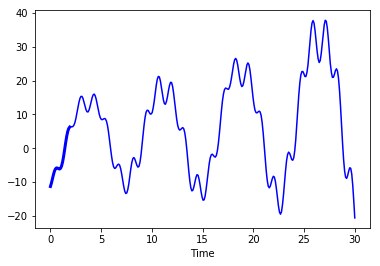

In [243]:
plt.plot(t, sequence2, "b-")
plt.plot(t[:n_steps], sequence2[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")

plt.show()

## Deep RNNs
#### 셀의 여러 레이어를 쌓은 deep RNN 
<img src = "image\ch14\deeprnn.png"> 

#### - Tensorflow에서 deep RNN 구현 
- 여러 cell 생성 후 MultiRNNCell로 쌓음 

In [145]:
##책 코드 
reset_graph()

n_inputs = 2
n_steps = 5

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

n_neurons = 100
n_layers = 3

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
multi_layer_cell = tf.contrib.rnn.MultiRNNCell([basic_cell] * n_layers) #3개쌓기 

outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

ValueError: Dimensions must be equal, but are 200 and 102 for 'rnn/while/rnn/multi_rnn_cell/cell_0/cell_0/basic_rnn_cell/MatMul_1' (op: 'MatMul') with input shapes: [?,200], [102,100].

In [136]:
##github 코드 
reset_graph()

##그래프 
n_inputs = 2
n_steps = 5

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

n_neurons = 100
n_layers = 3

layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons) for layer in range(n_layers)] #basic cell을 3개 만듦 
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers) #3개의 basic cell을 쌓음 
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

init = tf.global_variables_initializer()

##예
X_batch = np.random.rand(2, n_steps, n_inputs) #(2, 5, 2)

##실행 
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch})
    
outputs_val.shape #(2, n_steps, n_neurons)

(2, 5, 100)

- states는 각 레이어당 cell의 최종 state를 의미하는 하나의 텐서이며 형태는 [batch_size, n_neurons]
- MultiRNNCell 생성 시, state_is_tuple = False로 설정, 
    - state는 모든 레이어의 state를 열의 기준으로 합친 하나의 텐서이며 형태는 [batch_size, n_layers * n_neurons]

### Distributing a Deep RNN Across Multiple GPUs
#### 각 레이어를 다른 GPU에서 수핼할 수 있지만 각 cell을 다른 장치블록에서 생성할 수는 없음 
- BasicRNNCell은 cell 공장이지 cell 그 자체가 아님 
    - 공장을 생성한다고 cell이 생성되는 것이 아님 
    - 그러므로 장치 block은 무시됨 
- dynamic_rnn()을 호출했을 때, MultiRNNCell()이 호출되며 실제 cell을 생성하는 각 BasicRNNCell이 호출됨 
- 하지만 이런 클래스들 중 어떤 것도 어떤 변수를 어디서 생성할 것인가에 대한  장치 제어를 제공하지 않음 
     - 만약 dynamic_rnn()을 장치 block에서 호출한다면, 모든 RNN은 하나의 장치로 고정됨 
     
#### - 나만의 Cell Wrapper를 생성해서 사용  

In [152]:
class DeviceCellWrapper(tf.contrib.rnn.RNNCell):
  def __init__(self, device, cell):
    self._cell = cell
    self._device = device

  @property
  def state_size(self):
    return self._cell.state_size

  @property
  def output_size(self):
    return self._cell.output_size

  def __call__(self, inputs, state, scope=None):
    with tf.device(self._device):
        return self._cell(inputs, state, scope)

- __call__() 함수를 해당 장치 블록 내에서 감쌈 

In [155]:
reset_graph()

##그래프
n_inputs = 5
n_steps = 20
n_neurons = 100

X = tf.placeholder(tf.float32, shape=[None, n_steps, n_inputs])

#분배
devices = ["/gpu:0", "/gpu:1"]
cells = [DeviceCellWrapper(dev,tf.contrib.rnn.BasicRNNCell(num_units=n_neurons))for dev in devices]

multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

init = tf.global_variables_initializer()

##실행 
with tf.Session() as sess:
    init.run()
    print(sess.run(outputs, feed_dict={X: np.random.rand(2, n_steps, n_inputs)}))

[[[ -1.37844786e-01  -7.97303095e-02   1.61483200e-04 ...,   8.06202292e-02
    -1.83910221e-01  -6.52108639e-02]
  [ -8.14523697e-02  -2.69799650e-01  -2.95593619e-01 ...,  -1.29099339e-01
    -1.46585897e-01   4.94845547e-02]
  [ -3.00030243e-02  -1.75581723e-01  -1.50452137e-01 ...,   3.04398052e-02
    -1.76275253e-01   2.75164042e-02]
  ..., 
  [ -3.32829744e-01   1.42099187e-01   1.32749928e-02 ...,   2.86994934e-01
    -7.61650428e-02  -9.34598669e-02]
  [ -3.63994390e-01  -4.13319290e-01  -1.91389069e-01 ...,  -3.14392895e-01
    -2.49327660e-01  -1.70289986e-02]
  [ -4.08217132e-01  -2.79496938e-01   2.36487687e-02 ...,  -2.90068169e-03
    -3.48838657e-01   7.33767152e-02]]

 [[ -4.32376675e-02  -1.64652184e-01  -8.23244676e-02 ...,  -8.21322128e-02
    -1.61389917e-01  -6.49134293e-02]
  [ -3.55219468e-02  -1.78693667e-01  -1.72839046e-01 ...,   1.15809254e-02
    -1.85525328e-01   7.78150633e-02]
  [ -1.31133914e-01  -2.32327491e-01  -2.15082303e-01 ...,  -1.68500096e-02
  

### Applying Dropout
#### 아주 깊은 deep RNN 생서 시, 학습 데이터에 overfitting될 수 있음 
#### overfitting 방지를 위해 dropout 사용 
- RNN 전 또는 후에 dropout 레이어를 추가
- RNN 레이어들 사이에 dropout을 적용하고 싶을 때는 DropoutWrapper 사용 

#### - RNN 각 레이어의 입력에 50% dropout을 적용한 코드 

In [228]:
##책 코드 
reset_graph()

keep_prob = 0.5

cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
cell_drop = tf.contrib.rnn.DropoutWrapper(cell, input_keep_prob=keep_prob)
#output_keep_prob를 설정해 출력에도 dropout 적용 가능 

multi_layer_cell = tf.contrib.rnn.MultiRNNCell([cell_drop] * n_layers)

rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

ValueError: Tensor("rnn/Const:0", shape=(1,), dtype=int32) must be from the same graph as Tensor("ExpandDims:0", shape=(1,), dtype=int32).

In [244]:
##github 코드 
reset_graph() 

##그래프 
n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])
keep_prob = tf.placeholder_with_default(1.0, shape=())

cells = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons) for layer in range(n_layers)]

#dropout
#output_keep_prob를 설정해 출력에도 dropout 적용 가능
cells_drop = [tf.contrib.rnn.DropoutWrapper(cell, input_keep_prob=keep_prob) for cell in cells]

multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

learning_rate = 0.01

#stack - unstack
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = fully_connected(stacked_rnn_outputs, n_outputs, activation_fn=None)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

##실행 
n_iterations = 1500 
batch_size = 50 
train_keep_prob = 0.5

with tf.Session() as sess:
    init.run() 
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        _, mse = sess.run([training_op, loss], feed_dict={X : X_batch, y : y_batch, 
                                                         keep_prob : train_keep_prob})
        if iteration % 100 == 0:
            print(iteration, 'Training MSE :', mse)  

0 Training MSE : 14.9647
100 Training MSE : 4.85946
200 Training MSE : 3.64414
300 Training MSE : 3.65661
400 Training MSE : 3.61857
500 Training MSE : 2.54613
600 Training MSE : 3.7672
700 Training MSE : 4.05327
800 Training MSE : 3.96361
900 Training MSE : 3.74762
1000 Training MSE : 2.56352
1100 Training MSE : 3.75763
1200 Training MSE : 3.33759
1300 Training MSE : 3.04794
1400 Training MSE : 3.30904


- 하지만 학습 뿐만 아니라 테스트에도 dropout이 적용됨 
    - DropoutWrapper는 is_training placeholder를 제공하지 않음 
- 두가지 방법 
    - 직접 dropout wrapper 클래스를 생성 
    - 학습용/테스트용, 두개의 그래프를 사용 
    
#### - 두개의 그래프를 사용하는 방법

In [246]:
reset_graph()

import sys 

is_training = (sys.argv[-1] == 'train')

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

cell = tf.contrib.rnn.DropoutWrapper(cell, input_keep_prob=keep_prob)

if is_training:
    cell = tf.contrib.rnn.DropoutWrapper(cell, input_keep_prob=keep_prob)

multi_layer_cell = tf.contrib.rnn.MultiRNNCell([cell] * n_layers)

rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()


with tf.Session() as sess:
    if is_training:
        init.run()
        for iteration in range(n_ierations):
            X_batch, y_batch = next_batch(batch_size, n_steps)
            _, mse = sess.run([training_op, loss], feed_dict={X : X_batch, y : y_batch, 
                                                         keep_prob : train_keep_prob})
        if iteration % 100 == 0:
            print(iteration, 'Training MSE :', mse)  
        save_path = saver.save(sess, '\tmp\my_model.ckpt')
    else :
        saver.restore(sess, '\tmp\my_model.ckpt')
        for iteration in range(n_ierations):
            X_batch, y_batch = next_batch(batch_size, n_steps)
            _, mse = sess.run([training_op, loss], feed_dict={X : X_batch, y : y_batch, 
                                                         keep_prob : train_keep_prob})
        if iteration % 100 == 0:
            print(iteration, 'Training MSE :', mse)  

ValueError: Tensor("rnn/while/rnn/multi_rnn_cell/cell_0/dropout/random_uniform:0", shape=(?, 1), dtype=float32) must be from the same graph as Tensor("PlaceholderWithDefault:0", shape=(), dtype=float32).

### The Difficult of Training over Many Times 
#### 긴 sequence에 대해 RNN 학습 시, 많은 timestep을 거치면서 매우 깊은 신경망이 됨 
- vanishing / exploding gradients 문제 발생 
- 학습 시간이 매우 오래 걸림 

#### 앞에서 다뤘던 여러 해결방법들을 RNN에 적용할 수 있음 
- 좋은 파라미터 초기화 
- 포화하지 않는 활성화함수
- Batch Normalization
- Gradient Clipping
- 빠른 optimizer 

#### 하지만 만약 RNN이 긴 sequence를 잘 다뤄야 한다면 학습은 매우 느려질 것 

#### 긴 sequence를 다루는 문제에 대한 해결책 
#### - Truncated Backpropagation through tiime 
- 가장 보편적인 방법 
- 학습 동안 time step의 개수를 제한하여 unroll RNN 
- Tensorflow에서는 입력 sequence의 끝을 잘라 간단하게 구현 가능 
    - 예를 들어, 시계열 예측에서 학습 동안 n_steps을 줄이면 됨 
- 당연히 모델은 long-term 패턴을 학습할 수 없음 

#### - 제 2의 해결책(workaround)
- 줄어든 sequence(끝이 잘린)가 과거와 현재 데이터를 모두 포함해서 모델이 두가지 모두를 학습할 수 있도록 
- 하지만 만약 잘린 데이터가 실제로 유용한 데이터 일 수 있음 
    
 
#### 오랜 학습시간에 의해 RNN의 첫번째 입력에 대한 기억은 점점 사라짐
- 데이터가 RNN을 통과하면서 변환되고, 각 time step마다 데이터의 일부분은 사라짐 
    - 시간이 지나면서 사실상 state는 첫번째 입력에 대한 흔적을 갖지 않게됨 
- showstopper(하드웨어, 소프트웨어를 못쓰게 만드는 버그)가 될 수 있음 
- 예)
    - 시작이 'I loved this movie'인 긴 리뷰에 대한 감정 분석을 할 때
    - 내용의 나머지 부분이 영화를 더 좋게 만들 수 있는 것들에 대한 리스트일 경우 
    - RNN이 처음 네 단어를 점점 잊으면서 리뷰를 잘못 해석할 수 있음 
- 이러한 문제를 해결하기 위해 장기기억(long-term memory)을 사용한 여러 타입의 cell이 등장함 
    - basic cell은 더이상 사용되지 않음 

## LSTM Cell
#### (Long Short Term Memory Cell)
#### LSTM을 하나의 블럭박스로 여긴다면 basic cell 처럼 사용할 수 있음 
- basic cell보다 성능이 좋고, 빠름 

#### - Tensorflow에서 BasicLSTMCell을 통해 구현 가능 

In [229]:
lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)

In [230]:
reset_graph()
##그래프
n_steps = 28 
n_inputs = 28
n_neurons = 150 
n_outputs = 10 
n_layers = 3

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

#LSTM cell
lstm_cell = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons) for layer in range(n_layers)]
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cell)
outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)

top_layer_h_state = states[-1][1] #가장 위 레이어의 단기상태 h(t)
logits = fully_connected(top_layer_h_state, n_outputs, activation_fn=None)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

##실행 
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run() 
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((batch_size, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print("Epoch", epoch, "Train accuracy =", acc_train, "Test accuracy =", acc_test)

Epoch 0 Train accuracy = 0.953333 Test accuracy = 0.9519
Epoch 1 Train accuracy = 0.993333 Test accuracy = 0.9716
Epoch 2 Train accuracy = 0.986667 Test accuracy = 0.9752
Epoch 3 Train accuracy = 0.98 Test accuracy = 0.9768
Epoch 4 Train accuracy = 0.986667 Test accuracy = 0.9811
Epoch 5 Train accuracy = 0.993333 Test accuracy = 0.9833
Epoch 6 Train accuracy = 0.993333 Test accuracy = 0.9841
Epoch 7 Train accuracy = 0.98 Test accuracy = 0.9858
Epoch 8 Train accuracy = 1.0 Test accuracy = 0.9863
Epoch 9 Train accuracy = 1.0 Test accuracy = 0.9882


#### LSTM cell은 두개의 state 벡터를 다룸 
성능 때문에 기본적으로 각 각 분리해서 저장(파라미터(state_is_tuple=False)로 설정 가능)
- h(t) : 단기 상태 (short term state)
- c(t) : 장기 상태 (long term state)


<img src = "image\ch14\lstm.png"> 

#### 주요 아이디어는 신경망이 장기 상태에서 어떤 것을 저장하고, 어떤 것을 버리고, 어떤 것을 읽어드릴지 학습하는 것 

#### - c(t)
- 신경망 왼쪽에서 오른쪽으로 가로지르면서 먼저 망각 게이트(forget gate)를 통과하면서 몇몇 기억을 버림 
- 덧셈(addition) 연산을 통해 새로운 기억을 추가함 
    - 새로운 기억은 입력 게이트(input gate)에서 선택된 기억 
- 장기기억은 변환없이 그대로 전달됨 
- 즉, 각 time step마다 어떤 기억은 버려지고 어떤 기억은 추가됨 
    
#### - h(t)
- 덧셈 연산 후 장기 기억은 복사되고 tanh 함수를 통과함 
- 출력 게이트(output gate)에 필터링 됨 
- 단기 상태는 그 time step의 출력(y(t))과 동일 


#### 새로운 기억은 어디서 오고 게이트는 어떻게 작동하는가? 
<img src = "image\ch14\lstm.png"> 
#### 현재 입력 벡터 X(t)와 이전 단기 상태 h(t-1)이 4개의 다른 fully connected 레이어로 전달됨 
#### - main 레이어 
- 출력이 g(t)
- X(t)와 h(t-1)을 분석하는 역할 
- LSTM cell에서는 출력이 바로 전달되지 않고 장기 state에 부분적으로 저장됨 

#### - 나머지 3개 레이어 
- 게이트 관리자 (gate controllers)
- logistic 활성화 함수를 사용하기 때문에 출력은 0 ~ 1
- 각 레이어의 출력은 element-wise 곱셈 연산에 전달됨
    - 출력이 0이면 게이트는 닫힘 
    - 출력이 1이면 게이트는 열림 
    
 
#### - 게이트 
- 망각 게이트(forget gate) : f(t)로 제어, 장기 상태의 어떤 부분을 지울 것인지 제어 
- 입력 게이트(input gate) : i(t)로 제어, g(t)으 어떤 부분이 장기 상태에 저장될 것인지 제어 
- 출력 게이트(output gate) : o(t)로 제어, 장기 상태의 어떤 부분을 읽을 것인지와 현재 time step의 출력을 제어


#### 즉, LSTM cell은 중요한 입력을 인지하고, 그것을 장기 상태에 저장하는 것을 학습하고, (input gate)
####   그것이 필요할때까지 보존하는 것을 학습하고, (forget gate)
####   그것이 필요할 때 추출하는 것을 학습할 수 있음 
- 그러므로 시계열, 긴 텍스트, 음성 녹음 등의 장기 패턴을 성공적으로 포착할 수 있음 


### 수식 
#### -각 time step에서 하나의 데이터에 대해 cell의 장기 상태, 단기 상태, 출력을 계산하는 수식
<img src = "image\ch14\eq3.png">
- Wx로 시작하는 가중치는 입력 벡터 X(t)와 연결된 가중치 
- Wh로 시작하는 가중치는 이전 time step의 단기 상태 h(t-1) 와 연결된 가중치
- b는 각 4개의 레이어의 bias 
    - Tensorflow는 bf(forget gate의 bias)의 초기값을 0이 아닌 1로 채움(학습 시작에서 아무것도 잃지 않도록)  
- c(t) 장기 상태는 지난 장기 상태에서 버릴 것 + 이번 입력에서 얻을 것 
- y(t)=h(t) 출력(단기상태)는 현재 장기 상태(c(t))와 출력 게이트의 출력값의 element wise 곱 


### Peephole Connections 
#### LSTM에 추가적인 연결을 더한 변형 
- 기본 LSTM cell에서는 게이트 제어기들이 X(t)와 h(t-1)만 볼 수 있음 
- 그렇다면 게이트 제어기들에게 장기상태를 살짝 보게해서 맥락(context)을 약간 더 주자는 아이디어 
- 이전 time step의 장기상태 c(t-1)이 망각 게이트와 입력 게이트의 추가적인 입력으로 들어감 
- 현재의 장기상태 c(t)가 출력 게이트의 추가적인 입력으로 들어감 

#### - Tensorflow에서 구현 

In [ ]:
#반드시 BasicLSTMCell이 아닌 LSTMCell 사용 
#use_peepholes = True로 설정 
lstm_cell = tf.contrib.rnn.LSTMCell(num_units=n_neurons, use_peepholes=True)

In [135]:
reset_graph()
##그래프
n_steps = 28 
n_inputs = 28
n_neurons = 150 
n_outputs = 10 
n_layers = 3

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

#LSTM cell(peephole connections)
lstm_cell = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, use_peepholes=True)for layer in range(n_layers)]
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cell)
outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)

top_layer_h_state = states[-1][1] #가장 위 레이어의 단기상태 h(t)
logits = fully_connected(top_layer_h_state, n_outputs, activation_fn=None)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

##실행 
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run() 
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((batch_size, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print("Epoch", epoch, "Train accuracy =", acc_train, "Test accuracy =", acc_test)

Epoch 0 Train accuracy = 0.96 Test accuracy = 0.9469
Epoch 1 Train accuracy = 0.98 Test accuracy = 0.9732
Epoch 2 Train accuracy = 0.973333 Test accuracy = 0.9736
Epoch 3 Train accuracy = 1.0 Test accuracy = 0.9822
Epoch 4 Train accuracy = 0.98 Test accuracy = 0.9838
Epoch 5 Train accuracy = 1.0 Test accuracy = 0.9834
Epoch 6 Train accuracy = 0.98 Test accuracy = 0.9863
Epoch 7 Train accuracy = 1.0 Test accuracy = 0.9867
Epoch 8 Train accuracy = 0.993333 Test accuracy = 0.9865
Epoch 9 Train accuracy = 0.993333 Test accuracy = 0.9863


## GRU Cell
#### (Gated Recurrent Unit) 
#### 가장 유명한 LSTM 변형 
#### LSTM의 간소화된 버전 
<img src = "image\ch14\gru.png">
#### - 두 개의 상태 벡터(c(t), h(t))를 하나의 벡터 h(t)로 합침 
#### - 하나의 게이트 제어기가 망각게이트와 입력게이트 제어  z(t)
- 만약 게이트 제어기의 출력이 1이면, 입력게이트는 열리고 망각게이트는 닫힘 
- 만약 게이트 제어기의 출력이 0이면, 입력게이트는 닫히고 망각게이트는 열림 


#### - 출력 게이트는 없음 
- 각 time step에서 전체 상태 벡터가 출력이 됨 
- 대신, 새로운 게이트 제어기가 있음 r(t)
    - 이전 time step의 상태 중 어떤 부분이 main 레이어에 보여질 것인지 제어 
    
### 수식 
#### -각 time step에서 하나의 데이터에 대해 cell의 상태를 계산하는 수식
<img src = "image\ch14\gru.png">
<img src = "image\ch14\eq4.png">


#### - Tensorflow에서 구현 

In [12]:
gru_cell = tf.contrib.rnn.GRUCell(num_units=n_neurons)

## Natural Language Processing 
#### 최신 NLP 작업(기계번역, 자동요약, 어구해부, 감정분석)은 RNN에 기초함 


### Word Embeddings 
#### 먼저 단어 표현을 선택해야 함 
- one-hot 벡터로 표현 
- 만약 어휘가 50000단어를 포함한다고 가정하면, n번째 단어는 50000차원의 벡터로 표현됨(n번째만 1, 나머지는 0으로 표현 
    - 하지만 이러한 희박한(sparse) 표현은 큰 단어에서는 매우 비효율적 
- 이상적으로, 비슷한 단어는 비슷한 표현을 갖도록 하고 싶음 
    - 모델이 한 단어에 대해 모든 유사한 단어에 대해 배운 것을 일반화하는 것을 쉽게 하게 위해
    - 예)
        - 모델이 'I drink milk'가 유효한 문장이라고 할 때
        - 모델이 milk는 water와 가깝고 shoes와는 멀다는 것을 안다면 
        - 'I drink water'도 유효한 문장이고,, 'I drink shoes'는 유효하지 않은 문장이라는 것을 알 수 있을 것이다 
    - 하지민 어떻게 의미있는 표현을 생각해 낼 수 있을까
    
#### embedding 
- 어휘의 각 단어를 적당히 작고 밀집된 벡터로 표현하는 것 
- 학습동안 각 단어에 대한 좋은 embedding을 학습하도록 함 
- 학습 초기 시, embedding은 보통 임의로 선택됨 
- 학습이 진행되면서 역전파가 embedding이 신경망의 작업에 도움이 되도록 이동시킴 
- 비슷한 단어들은 점점 가까이 무리짓게 되고, 최종적으로 더 의미있는 체계가 되게 됨 


#### - Tensorflow 구현 
- 먼저 어휘 내의 모든 단어를 위한 embedding을 표현하는 변수를 먼저 생성해 준다 

In [14]:
vocabulary_size = 50000
embedding_size = 150
embeddings = tf.Variable(tf.random_uniform([vocabulary_size, embedding_size], -1.0, -1.0)) #임의로 초기화 

#### 신경망에 'I drink milk' 문장을 전달한다고 가정 
- 먼저 문장을 전처리 하고 알려진 단어로 쪼개야 함 
    - 예)
    - 필요없는 글자를 제거, 모르는 단어를 '[UNK]'와 같은 미리 정의된 토큰으로 대체 
    - 숫자 값을 '[NUM]'으로 대체, URL을 ['URL']로 대체 등 
- 알려진 단어로 리스트를 만들었으면 사전에서 각 단어의 정수 식별자를 찾을 수 있음 (0 ~ 49999)
    - 예)
    - 'I drink milk' --> [72, 3335, 288]
    
#### - Tensorflow 구현 
- 이러한 단어 식별자들을 Tensorflow placeholder를 사용해 전달하고 
- embedding_lookup() 함수를 적용해 대응하는 embedding을 얻을 수 있음 

In [15]:
train_inputs = tf.placeholder(tf.int32, shape=[None]) #정수 식별자를 
embed = tf.nn.embedding_lookup(embeddings, train_inputs) #embedding으로 

- 모델이 한번 좋은 word embedding을 학습하면, 어느 NLP 작업에서도 유용하게 사용될 수 있음 
- 새로운 word embedding을 학습하는 것 대신에 이미 학습된 word embedding을 다운 받을 수 있음 
    - 이미 학습된 레이어를 재사용했던 것 처럼, 학습된 embedding들의 동결 유무를 선택할 수 있음 
        - 동결시키면 학습 속도는 빨라지고 동결시키지 않으면 약간 더 좋은 성능을 얻을 수 있음 
        
#### ※
- embedding은 카테고리 속성 표현에도 유용함 
    - 다른 값들이 많은 경우, 특히 값들 간의 복잡한 유사성을 가지는 경우 
    - 예) 직업, 취미, 음식, 종, 브랜드 등을 고려할 때 

### An Encoder-Decoder Network for Machine Learning
#### 영어를 불어로 번역하는 간단한 기계 번역 모델 
<img src = "image\ch14\ende.png">
- 영어 문장은 encoder로 전달되고 decoder는 불어 번역을 출력 
- 불어 번역들은 한 단계 앞서서 decoder의 입력으로도 사용됨 
- decoder는 이전 단계에서 출력이어야 하는 것을 입력으로 받음 (실제 출력과 관계없이)
- 가장 처음 단어를 위해 문장의 시작을 의미하는 토큰을 전달함
- decoder는 eos(end of sentence) 토큰으로 문장을 끝낼 것이 예상됨 
- 영어 문장은 encoder에 전달되기 전에 반전됨 
    - 영어문장의 처음이 encoder에 마지막으로 전달되도록 
    - decoder의 번역에 필요한 유용한 것은 대부분 처음 단어이니까 
- 각 단어는 간단한 정수 식별자로 표현됨 
    - milk --> 288
- embedding lookup이 실제로 encoder와 decoder로 전달되는 word embedding을 반환함 
- 각 단계마다, decoder는 출력 어휘(불어)의 각 단어의 점수를 출력함
- softmax 레이어는 그 점수를 확률로 바꿈 
    - 예)
    - 첫번째 단계에서 'Je'는 20%, 'Tu'는 1% 등등 
- 가장 높은 확률을 가지는 단어가 출력이 됨 
    - softmax_cross_entropy_with_logits() 함수를 통해 모델 학습 가능 
- 학습 후의 추론시간(테스트)에는 decoder에 넣을 타겟 문장이 없음 
    - 대신 간단하게 이전 단계의 출력을 decoder로 전달 
    <img src = "image\ch14\decoder.png">

### Tensorflow의 seq2seq 모델과의 차이점
#### - 실제 문장의 길이는 매우 다양하지만 모든 입력 sequence가 일정한 길이를 가질 것이라 가정 
- sequence_length 부분을 static_rnn(), dynamic_rnn()함수로 각 문장의 길이를 명시
- tutorial에서 사용한 방법, 문장들을 비슷한 길이들끼리 buket으로 그룹화 
    - 더 작은 문장들은 특별한 padding 토큰으로 빈곳을 채워 줌 
    - 예) 1 ~ 6, 7 ~ 12 와 같은 버킷으로 구분했을 때 
    - 'milk drink I'는 첫번째 버킷에 'PAD PAD PAD milk drink I'가 되고 번역은 'Je bois du lait eos PAD'가 됨 
- eos 토큰을 거친 출력을 무시하고 싶다 
    - target_weights 벡터 사용 
    
    
#### - 출력 어휘의 크기가 클 때, 각각의 모든 가능한 단어에 대한 확률을 출력하는 것은 매우 오래걸릴 것 
- 타겟 어휘가 50000개의 단어를 포함할 때, decoder는 50000차원의 벡터를 출력하고 그것에 대해 softmax 연산을 해야 함 
- sampled softmax 기법 
    - decoder의 출력을 더 적게 둠 
           - 1000차원 벡터 
    - 타겟 어휘의 모든 단어마다의 연산 없이 loss를 추정하는 sampling 기법을 사용 
    - sampled_softmax_loss() 
    

#### - tutorial 구현은 attention mechanism을 사용 
- decoder가 입력 sequence를 볼 수 있도록 
- 자세한 설명은 이 책 영역 밖 

#### - tutorial 구현은 tf.nn.legacy_seq2seq 모듈 사용 
- 다양한 encoder-decoder 모델을 쉽게 생성할 수 있도록 해 줌 
- 예)
    - embedding_rnn_seq2seq() : 자동적으로 word embedding을 고려하여 encoder-decoder 모델을 생성함 
    

#### - Tensorflow's Word2Vec tutorial 

In [177]:
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""Basic word2vec example."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import math
import os
import random
from tempfile import gettempdir
import zipfile

import numpy as np
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf

# Step 1: Download the data.
url = 'http://mattmahoney.net/dc/'


# pylint: disable=redefined-outer-name
def maybe_download(filename, expected_bytes):
  """Download a file if not present, and make sure it's the right size."""
  local_filename = os.path.join(gettempdir(), filename)
  if not os.path.exists(local_filename):
    local_filename, _ = urllib.request.urlretrieve(url + filename,
                                                   local_filename)
  statinfo = os.stat(local_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', filename)
  else:
    print(statinfo.st_size)
    raise Exception('Failed to verify ' + local_filename +
                    '. Can you get to it with a browser?')
  return local_filename


filename = maybe_download('text8.zip', 31344016)


# Read the data into a list of strings.
def read_data(filename):
  """Extract the first file enclosed in a zip file as a list of words."""
  with zipfile.ZipFile(filename) as f:
    data = tf.compat.as_str(f.read(f.namelist()[0])).split()
  return data

vocabulary = read_data(filename)
print('Data size', len(vocabulary))

# Step 2: Build the dictionary and replace rare words with UNK token.
vocabulary_size = 50000


def build_dataset(words, n_words):
  """Process raw inputs into a dataset."""
  count = [['UNK', -1]]
  count.extend(collections.Counter(words).most_common(n_words - 1))
  dictionary = dict()
  for word, _ in count:
    dictionary[word] = len(dictionary)
  data = list()
  unk_count = 0
  for word in words:
    index = dictionary.get(word, 0)
    if index == 0:  # dictionary['UNK']
      unk_count += 1
    data.append(index)
  count[0][1] = unk_count
  reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
  return data, count, dictionary, reversed_dictionary

# Filling 4 global variables:
# data - list of codes (integers from 0 to vocabulary_size-1).
#   This is the original text but words are replaced by their codes
# count - map of words(strings) to count of occurrences
# dictionary - map of words(strings) to their codes(integers)
# reverse_dictionary - maps codes(integers) to words(strings)
data, count, dictionary, reverse_dictionary = build_dataset(vocabulary,
                                                            vocabulary_size)
del vocabulary  # Hint to reduce memory.
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10], [reverse_dictionary[i] for i in data[:10]])

data_index = 0

# Step 3: Function to generate a training batch for the skip-gram model.
def generate_batch(batch_size, num_skips, skip_window):
  global data_index
  assert batch_size % num_skips == 0
  assert num_skips <= 2 * skip_window
  batch = np.ndarray(shape=(batch_size), dtype=np.int32)
  labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
  span = 2 * skip_window + 1  # [ skip_window target skip_window ]
  buffer = collections.deque(maxlen=span)
  if data_index + span > len(data):
    data_index = 0
  buffer.extend(data[data_index:data_index + span])
  data_index += span
  for i in range(batch_size // num_skips):
    context_words = [w for w in range(span) if w != skip_window]
    words_to_use = random.sample(context_words, num_skips)
    for j, context_word in enumerate(words_to_use):
      batch[i * num_skips + j] = buffer[skip_window]
      labels[i * num_skips + j, 0] = buffer[context_word]
    if data_index == len(data):
      buffer[:] = data[:span]
      data_index = span
    else:
      buffer.append(data[data_index])
      data_index += 1
  # Backtrack a little bit to avoid skipping words in the end of a batch
  data_index = (data_index + len(data) - span) % len(data)
  return batch, labels

batch, labels = generate_batch(batch_size=8, num_skips=2, skip_window=1)
for i in range(8):
  print(batch[i], reverse_dictionary[batch[i]],
        '->', labels[i, 0], reverse_dictionary[labels[i, 0]])

# Step 4: Build and train a skip-gram model.

batch_size = 128
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1       # How many words to consider left and right.
num_skips = 2         # How many times to reuse an input to generate a label.
num_sampled = 64      # Number of negative examples to sample.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent. These 3 variables are used only for
# displaying model accuracy, they don't affect calculation.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)


graph = tf.Graph()

with graph.as_default():

  # Input data.
  train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
  train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
  valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

  # Ops and variables pinned to the CPU because of missing GPU implementation
  with tf.device('/cpu:0'):
    # Look up embeddings for inputs.
    embeddings = tf.Variable(
        tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
    embed = tf.nn.embedding_lookup(embeddings, train_inputs)

    # Construct the variables for the NCE loss
    nce_weights = tf.Variable(
        tf.truncated_normal([vocabulary_size, embedding_size],
                            stddev=1.0 / math.sqrt(embedding_size)))
    nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

  # Compute the average NCE loss for the batch.
  # tf.nce_loss automatically draws a new sample of the negative labels each
  # time we evaluate the loss.
  # Explanation of the meaning of NCE loss:
  #   http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
  loss = tf.reduce_mean(
      tf.nn.nce_loss(weights=nce_weights,
                     biases=nce_biases,
                     labels=train_labels,
                     inputs=embed,
                     num_sampled=num_sampled,
                     num_classes=vocabulary_size))

  # Construct the SGD optimizer using a learning rate of 1.0.
  optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(loss)

  # Compute the cosine similarity between minibatch examples and all embeddings.
  norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
  normalized_embeddings = embeddings / norm
  valid_embeddings = tf.nn.embedding_lookup(
      normalized_embeddings, valid_dataset)
  similarity = tf.matmul(
      valid_embeddings, normalized_embeddings, transpose_b=True)

  # Add variable initializer.
  init = tf.global_variables_initializer()

# Step 5: Begin training.
num_steps = 100001

with tf.Session(graph=graph) as session:
  # We must initialize all variables before we use them.
  init.run()
  print('Initialized')

  average_loss = 0
  for step in xrange(num_steps):
    batch_inputs, batch_labels = generate_batch(
        batch_size, num_skips, skip_window)
    feed_dict = {train_inputs: batch_inputs, train_labels: batch_labels}

    # We perform one update step by evaluating the optimizer op (including it
    # in the list of returned values for session.run()
    _, loss_val = session.run([optimizer, loss], feed_dict=feed_dict)
    average_loss += loss_val

    if step % 2000 == 0:
      if step > 0:
        average_loss /= 2000
      # The average loss is an estimate of the loss over the last 2000 batches.
      print('Average loss at step ', step, ': ', average_loss)
      average_loss = 0

    # Note that this is expensive (~20% slowdown if computed every 500 steps)
    if step % 10000 == 0:
      sim = similarity.eval()
      for i in xrange(valid_size):
        valid_word = reverse_dictionary[valid_examples[i]]
        top_k = 8  # number of nearest neighbors
        nearest = (-sim[i, :]).argsort()[1:top_k + 1]
        log_str = 'Nearest to %s:' % valid_word
        for k in xrange(top_k):
          close_word = reverse_dictionary[nearest[k]]
          log_str = '%s %s,' % (log_str, close_word)
        print(log_str)
  final_embeddings = normalized_embeddings.eval()

# Step 6: Visualize the embeddings.


# pylint: disable=missing-docstring
# Function to draw visualization of distance between embeddings.
def plot_with_labels(low_dim_embs, labels, filename):
  assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
  plt.figure(figsize=(18, 18))  # in inches
  for i, label in enumerate(labels):
    x, y = low_dim_embs[i, :]
    plt.scatter(x, y)
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

  plt.savefig(filename)

try:
  # pylint: disable=g-import-not-at-top
  from sklearn.manifold import TSNE
  import matplotlib.pyplot as plt

  tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
  plot_only = 500
  low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
  labels = [reverse_dictionary[i] for i in xrange(plot_only)]
  plot_with_labels(low_dim_embs, labels, os.path.join(gettempdir(), 'tsne.png'))

except ImportError as ex:
  print('Please install sklearn, matplotlib, and scipy to show embeddings.')
  print(ex)


Found and verified text8.zip
Data size 17005207
Most common words (+UNK) [['UNK', 418391], ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764)]
Sample data [5237, 3082, 12, 6, 195, 2, 3135, 46, 59, 156] ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against']
3082 originated -> 12 as
3082 originated -> 5237 anarchism
12 as -> 6 a
12 as -> 3082 originated
6 a -> 12 as
6 a -> 195 term
195 term -> 6 a
195 term -> 2 of
Initialized
Average loss at step  0 :  273.632202148
Nearest to new: ottomans, romances, multipurpose, proving, mikvah, fasts, intercalary, third,
Nearest to people: anomalous, filthy, tropics, bottles, bulletproof, bunt, incurring, hiroshima,
Nearest to on: travelled, landlord, termites, nac, cygnus, merged, ph, modafinil,
Nearest to or: mediocrity, murron, disestablishment, rajah, normand, sacu, nitro, crony,
Nearest to so: plastics, epileptic, horned, subversive, quadrangle, revolved, mychal, calculations,
Nearest to th: fen

Average loss at step  50000 :  5.00640691757
Nearest to new: third, bede, romances, middle, solicitation, vaccines, chance, agave,
Nearest to people: anomalous, circ, dek, families, aurangzeb, dasyprocta, archie, tropics,
Nearest to on: in, from, two, agouti, during, dasyprocta, archie, with,
Nearest to or: and, eight, circ, dasyprocta, four, operatorname, five, aediles,
Nearest to so: celebrities, subversive, quest, plastics, faction, outta, eyes, kerensky,
Nearest to th: six, akita, eight, nine, four, zero, fennel, seven,
Nearest to between: in, fulton, for, from, against, with, agouti, carthage,
Nearest to however: but, and, agouti, gives, that, yin, although, akimbo,
Nearest to i: he, lemmy, try, UNK, pentecostals, who, we, pretender,
Nearest to seven: eight, six, five, four, three, nine, zero, agouti,
Nearest to from: in, through, on, into, and, rede, for, by,
Nearest to up: nt, nebuchadnezzar, galleon, items, compact, bastiat, undo, flew,
Nearest to united: under, industrialist, 

# + 

In [11]:
x = np.array([[[1, 2, 3], [1, 2, 3]],
              [[4, 5, 6], [4, 5, 6]],
              [[7, 8, 9], [7, 8, 9]],
              [[10, 11, 12], [10, 11, 12]]])
x.shape

(4, 2, 3)

In [16]:
x_t = tf.transpose(x, perm=[1, 0, 2])
x_t.shape

TensorShape([Dimension(2), Dimension(4), Dimension(3)])

In [21]:
x_tu = tf.unstack(x_t)
x_tu

[<tf.Tensor 'unstack_4:0' shape=(4, 3) dtype=int32>,
 <tf.Tensor 'unstack_4:1' shape=(4, 3) dtype=int32>]

In [25]:
x_t = np.transpose(x, (1, 0, 2))
print(x_t)
print(x_t.shape)

[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]
  [10 11 12]]

 [[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]
  [10 11 12]]]
(2, 4, 3)


#### reduce_mean()

In [53]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [58]:
x=np.array([[1., 1.], 
            [2., 2.]])
x.shape

(2, 2)

In [64]:
x_ = tf.reduce_mean(x).eval(session=sess)
print(x_)
print(x_.shape, x_.dtype)

1.5
() float64


- default
    - 전체 원소의 평균 
- axis = 0
    - 열방향 생성의 평균 
- axis = 1
    - 행방향 생성의 평균 

In [66]:
x_2 = tf.reduce_mean(x, axis=0).eval(session=sess)
print(x_2)
print(x_2.shape, x_2.dtype)

[ 1.5  1.5]
(2,) float64


In [72]:
x_2 = tf.reduce_mean(x, axis=0, keep_dims=True).eval(session=sess)
print(x_2)
print(x_2.shape, x_2.dtype)

[[ 1.5  1.5]]
(1, 2) float64


In [73]:
x_3 = tf.reduce_mean(x, axis=1).eval(session=sess)
print(x_3)
print(x_3.shape, x_3.dtype)

[ 1.  2.]
(2,) float64


In [74]:
x_3 = tf.reduce_mean(x, axis=1, keep_dim=True).eval(session=sess)
print(x_3)
print(x_3.shape, x_3.dtype)

[[ 1.]
 [ 2.]]
(2, 1) float64


#### MNIST

In [76]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('/tmp/data')
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs)) #reshape
y_test = mnist.test.labels

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [84]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001CD5BE51EB8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001CD5BEA0978>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001CD5BEA06A0>)

In [78]:
X_test.shape

(10000, 28, 28)

In [80]:
y_test.shape

(10000,)

In [138]:
a = np.random.rand(2, 10, 20)
a.shape

(2, 10, 20)

#### tf.nn.in_top_k()

In [243]:
lo = [[0.1, 0.2, 0.8], [0.0, 0.8, 0.1]]
ta = [2, 2]

tf.nn.in_top_k(lo, ta, 1)

with tf.Session() as sess:
    k = tf.nn.in_top_k(lo, ta, 1)
    
    print(k.eval())

[ True False]


#### reshape()

In [60]:
a = np.array([[1, 2, 3], [4, 5, 6]]) #(2, 3)
print(a.reshape(-1, 2, 1))
print(a.reshape(-1, 2, 1).shape)

[[[1]
  [2]]

 [[3]
  [4]]

 [[5]
  [6]]]
(3, 2, 1)


In [61]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(a)
print(a.reshape(-1, 3, 3))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[[1 2 3]
  [4 5 6]
  [7 8 9]]]


In [62]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print(a)
print(a.reshape(-1, 6, 2))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[[ 1  2]
  [ 3  4]
  [ 5  6]
  [ 7  8]
  [ 9 10]
  [11 12]]]


In [63]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print(a)
print(a.reshape(-1, 3, 4))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]]


#### embedding

In [3]:
#http://khanrc.tistory.com/entry/TensorFlow-6-word2vec-Theory?category=561978

from six.moves import urllib

import errno
import os
import zipfile

WORDS_PATH = "datasets/words"
WORDS_URL = 'http://mattmahoney.net/dc/text8.zip'

def mkdir_p(path):
    """Create directories, ok if they already exist.
    
    This is for python 2 support. In python >=3.2, simply use:
    >>> os.makedirs(path, exist_ok=True)
    """
    try:
        os.makedirs(path)
    except OSError as exc:
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise

            
    
def fetch_words_data(words_url=WORDS_URL, words_path=WORDS_PATH):
    os.makedirs(words_path, exist_ok=True)
    zip_path = os.path.join(words_path, "words.zip")
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(words_url, zip_path)
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    return data.decode("ascii").split()

In [4]:
words = fetch_words_data()

In [5]:
#Build the dictionary 

from collections import Counter

vocabulary_size = 50000

vocabulary = [('UNK', None)] + Counter(words).most_common(vocabulary_size-1)
#Counter().most_common(n) : 각 words에 대한 개수를 세고 개수가 많은 상위 n개 반환 

vocabulary = np.array([word for word, _ in vocabulary]) #단어만 

dictionary = {word : code for code, word in enumerate(vocabulary)} #단어 : 
data = np.array([dictionary.get(word, 0) for word in words])
#dictionary.get(key, default) : 값이 없을 경우 default

In [6]:
data

array([5234, 3081,   12, ...,   22,   16,   73])

In [7]:
words

['anarchism',
 'originated',
 'as',
 'a',
 'term',
 'of',
 'abuse',
 'first',
 'used',
 'against',
 'early',
 'working',
 'class',
 'radicals',
 'including',
 'the',
 'diggers',
 'of',
 'the',
 'english',
 'revolution',
 'and',
 'the',
 'sans',
 'culottes',
 'of',
 'the',
 'french',
 'revolution',
 'whilst',
 'the',
 'term',
 'is',
 'still',
 'used',
 'in',
 'a',
 'pejorative',
 'way',
 'to',
 'describe',
 'any',
 'act',
 'that',
 'used',
 'violent',
 'means',
 'to',
 'destroy',
 'the',
 'organization',
 'of',
 'society',
 'it',
 'has',
 'also',
 'been',
 'taken',
 'up',
 'as',
 'a',
 'positive',
 'label',
 'by',
 'self',
 'defined',
 'anarchists',
 'the',
 'word',
 'anarchism',
 'is',
 'derived',
 'from',
 'the',
 'greek',
 'without',
 'archons',
 'ruler',
 'chief',
 'king',
 'anarchism',
 'as',
 'a',
 'political',
 'philosophy',
 'is',
 'the',
 'belief',
 'that',
 'rulers',
 'are',
 'unnecessary',
 'and',
 'should',
 'be',
 'abolished',
 'although',
 'there',
 'are',
 'differing',
 '

In [8]:
vocabulary

array(['UNK', 'the', 'of', ..., 'unscr', 'leonards', 'hif'],
      dtype='<U28')

In [9]:
vocabulary_1 = [('UNK', None)] + Counter(words).most_common(vocabulary_size-1)
vocabulary_1

[('UNK', None),
 ('the', 1061396),
 ('of', 593677),
 ('and', 416629),
 ('one', 411764),
 ('in', 372201),
 ('a', 325873),
 ('to', 316376),
 ('zero', 264975),
 ('nine', 250430),
 ('two', 192644),
 ('is', 183153),
 ('as', 131815),
 ('eight', 125285),
 ('for', 118445),
 ('s', 116710),
 ('five', 115789),
 ('three', 114775),
 ('was', 112807),
 ('by', 111831),
 ('that', 109510),
 ('four', 108182),
 ('six', 102145),
 ('seven', 99683),
 ('with', 95603),
 ('on', 91250),
 ('are', 76527),
 ('it', 73334),
 ('from', 72871),
 ('or', 68945),
 ('his', 62603),
 ('an', 61925),
 ('be', 61281),
 ('this', 58832),
 ('which', 54788),
 ('at', 54576),
 ('he', 53573),
 ('also', 44358),
 ('not', 44033),
 ('have', 39712),
 ('were', 39086),
 ('has', 37866),
 ('but', 35358),
 ('other', 32433),
 ('their', 31523),
 ('its', 29567),
 ('first', 28810),
 ('they', 28553),
 ('some', 28161),
 ('had', 28100),
 ('all', 26229),
 ('more', 26223),
 ('most', 25563),
 ('can', 25519),
 ('been', 25383),
 ('such', 24413),
 ('many', 24

In [10]:
words[1], data[1]

('originated', 3081)

In [11]:
#Generate batches
# minibatch 생성 
import random 
from collections import deque

def generate_batch(batch_size, num_skips, skip_window):
    global data_index #이 함수가 계속 재 호출되어도 data_index의 값은 유지 
    
    #assert : 이렇지 않을 경우 error
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    
    batch = np.ndarray(shape = (batch_size), dtype = np.int32)
    labels = np.ndarray(shape = (batch_size, 1), dtype = np.int32)
    span = 2 * skip_window + 1 #[skip_window  target  skip_window]
    
    #deque : 양쪽에서 모두 push, pop을 할 수 있음 
    buffer = deque(maxlen=span)
    
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    
    #skip-gram은 타겟 단어로부터 주변의 컨텍스트 단어를 예측하는 모델 
    #모델 학습 전에 words를 (target, context)형탸로 변화해주어야 함 
    #아래 코드는 그 작업을 batch size 크기로 수행 
    for i in range(batch_size // num_skips): 
        target = skip_window 
        targets_to_avoid = [skip_window]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = random.randint(0, span -1)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
            
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

In [12]:
data_index = 0
batch, labels = generate_batch(8, 2, 1)

In [13]:
batch

array([3081, 3081,   12,   12,    6,    6,  195,  195])

In [14]:
[vocabulary[word] for word in batch]

['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term']

In [15]:
labels

array([[  12],
       [5234],
       [   6],
       [3081],
       [  12],
       [ 195],
       [   6],
       [   2]])

In [16]:
[vocabulary[word] for word in labels[:, 0]]

['as', 'anarchism', 'a', 'originated', 'as', 'term', 'a', 'of']

In [18]:
#build the model 
reset_graph()

##그래프 
batch_size = 128 
embedding_size =128 
skip_window = 1 #오른쪽, 왼쪽으로 몇 개의 단어를 고려할 것인가 
num_skips = 2  #라벨 생성에 입력을 몇 번 사용할 것인가 


#[0 ~ valid_window]의 배열을 만들고 거기서 valid_size만큼 샘플링 
#여기서는 0 ~ 100 중 랜덤하게 16개를 고른 것이 valid_examples 
#We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64    # Number of negative examples to sample.

#입력 데이터 
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32) 

#어휘, embedding 
vocabulary_size = 50000
embedding_size = 150 

#입력에 대한 embedding 찾기 
init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0) #랜덤초기화
embeddings = tf.Variable(init_embeds)

train_inputs = tf.placeholder(tf.int32, shape=[None])

#전체 embedding matrix에서 train_inputs가 가리키는 임베딩 벡터만을 추출 
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

# Construct the variables for the NCE loss

nce_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                        stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

# Compute the average NCE loss for the batch.
# tf.nce_loss automatically draws a new sample of the negative labels each
# time we evaluate the loss.
loss = tf.reduce_mean(
    tf.nn.nce_loss(nce_weights, nce_biases, train_labels, embed,
                   num_sampled, vocabulary_size))

optimizer = tf.train.AdamOptimizer(0.1)
training_op = optimizer.minimize(loss)

# Compute the cosine similarity between minibatch examples and all embeddings.
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), axis=1, keep_dims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

init = tf.global_variables_initializer()


num_steps = 10001

with tf.Session() as session:
    init.run()

    average_loss = 0
    for step in range(num_steps):
        print("\rIteration: {}".format(step), end="\t")
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs : batch_inputs, train_labels : batch_labels}

        # We perform one update step by evaluating the training op (including it
        # in the list of returned values for session.run()
        _, loss_val = session.run([training_op, loss], feed_dict=feed_dict)
        average_loss += loss_val

        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
            # The average loss is an estimate of the loss over the last 2000 batches.
            print("Average loss at step ", step, ": ", average_loss)
            average_loss = 0

        # Note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = vocabulary[valid_examples[i]]
                top_k = 8 # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log_str = "Nearest to %s:" % valid_word
                for k in range(top_k):
                    close_word = vocabulary[nearest[k]]
                    log_str = "%s %s," % (log_str, close_word)
                print(log_str)

    final_embeddings = normalized_embeddings.eval()

Iteration: 0	Average loss at step  0 :  285.433898926
Nearest to people: blissymbolics, mike, buffers, untouchables, carolingian, posted, ville, hypertalk,
Nearest to can: intermediary, milder, talon, domineering, marsalis, michael, amines, detachments,
Nearest to than: lame, watts, stones, sram, elves, zarqawi, applets, cloves,
Nearest to its: knob, abeokuta, bracelet, bastards, ivens, objectivity, derived, blanton,
Nearest to their: gaye, parsing, producer, afghana, javier, detrimental, lesbos, kin,
Nearest to have: india, bubba, atheromatous, bauds, userbase, englishmen, supersymmetry, casuistry,
Nearest to six: melds, signer, hurtful, paws, ev, melodies, perennially, adf,
Nearest to over: tt, tuned, manichaeans, fractional, cambridge, balaguer, fluoride, strenuously,
Nearest to two: annihilate, bettors, wir, cindy, epinephrine, team, voluntarily, crystallize,
Nearest to UNK: fi, reykjav, rosalyn, mainline, ean, crippling, paratime, tasked,
Nearest to was: russo, rammed, investiture

In [19]:
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

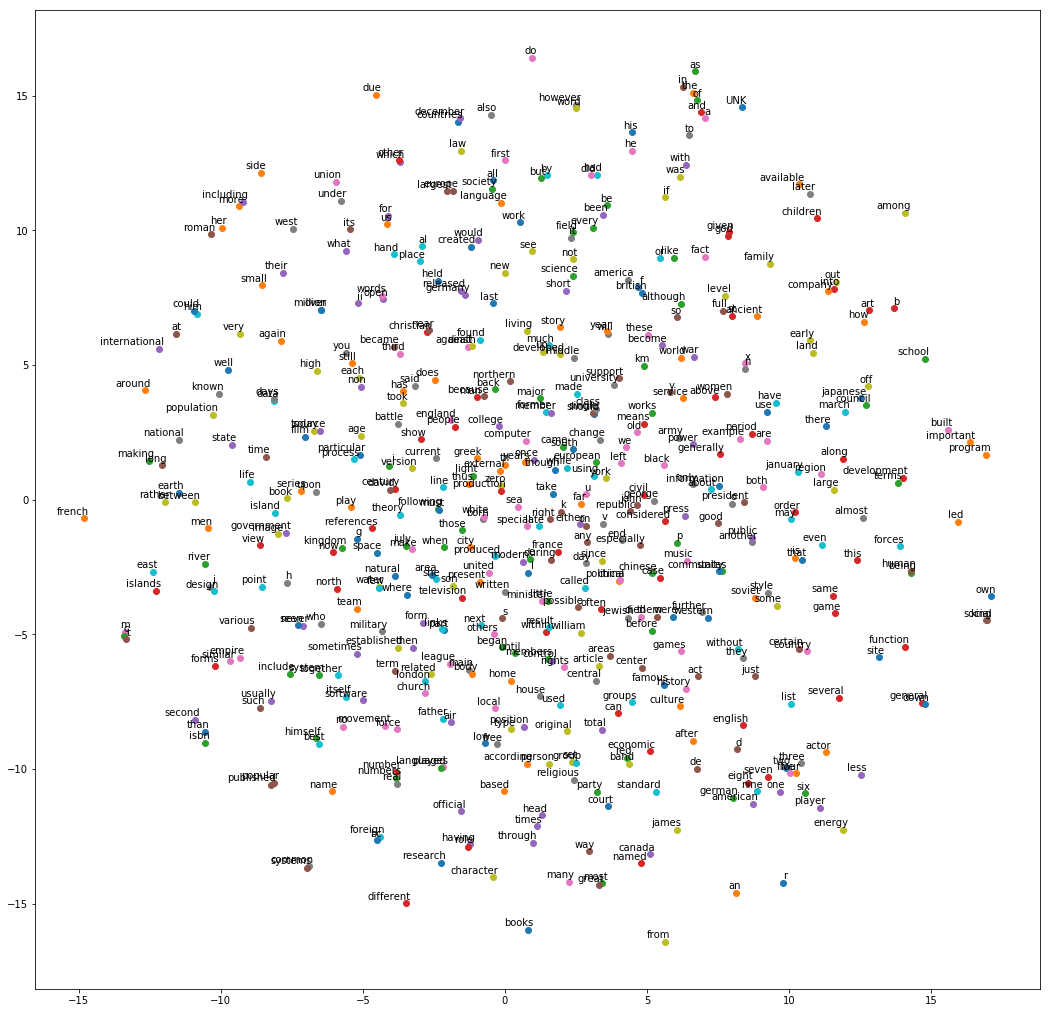

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [vocabulary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)
plt.show()